# CMSC471 Artificial Intelligence

# Project Final Submission

## Project Title

*Type your name and ID here* (for groups, include all team members' names and IDs AND their role/contribution)
<p>Alan Wong - NF55972, - 
<p>Ching Zheng - JA93772, - 
<p>Nimish Kapoor - WO69695, - 

## Problem Description

- Specify exactly what ML approach your problem is: Binary classification, multi-class classification, or regression (groups should work on two approaches).


- Then, explain the problem further. Be clear and concise.

<p>Determining whether someone will be able to pay their statements on time by their due date given their previous history of credit card payments. Of course, the most important factors taken into consideration would be the account balance that they would have held and the status of their bill. Other factors taken into consideration will be, for example, their education, their age, etc. The approach to determining whether or not a given person will default is a binary classification.</p>
<p>For the house price dataset, details and features of a home such as: square footage, the number of bathrooms and bedrooms are provided to predict the price of that house. Owning a home is a costly expenditure, and it is ideal to purchase a home when the housing market is in an acceptable state. Thus, we want to predict the future value of that house in the event that the house needs to be sold with regression.

## Motivation

Explain briefly why this problem is important and how you became interested in it. You may use the motivation from the proposal.
<p> We as a group are interested in finance and real estate as a possible future career, and are hoping to use this project as a stepping stone into the field of finance and real estate to get a better idea of what might be in store for us. As adults, we would all like to own a home one day, so exploring the housing market data will help us prepare for when it’s time to purchase a home.

## Dataset

- Link to dataset source:
<p>Credit Card Default Payment Dataset</p>
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

<p>House Price Prediction Dataset</p>
https://www.kaggle.com/shree1992/housedata#data.csv

- <b>Label/target</b> description - What column in your dataset you are trying to predict? Specify exactly what your target feature (label) is. It must be one of the dataset columns. For image classification, specify your class labels.
<p>For the credit card default payment, the column we are trying to predict is the default.payment.next.month column, labeled "target" in the dataset.</p>

<p>For the house price dataset, the column we are trying to predict is the "price" column.</p>

- Feature description: briefly explain each of the features/columns.

<p> Credit Card Default Payment:</p>
The features contain 6 amounts each for payments, repayment status (categorical here) and the amount of the previous payments (18 in total). These 6 amounts each go from April 2005 to September 2005. Other features also include age, gender, education status, marriage status and their given credit amount. 

<p>House Price Prediction:</p>
The features in the housing dataset contain house details like the number of bedrooms, bathrooms, square feet of living space, above living space, basement space (if it has a basement), a rating of the view, the city in Washington State, the year it was built, and whether or not it's on the water. The dataset also contains the street and time it was sold. 

- Include the code for loading, showing the data head (if loaded with pandas) and reporting the data shape via sklearn, pandas or tensorflow in the following cell. 


- For image classification or special non-pandas datasets, show at least one sample of the data.


- <b>Your data should be loaded error-free (otherwise your whole project gets zero credit). You should attach the data to your final project submission in a zip file.</b> If your dataset is too large and can't be uploaded in Blackboard, you should email the dataset to the instructor BEFORE the deadline!

## <font color="red"> Required Coding

In [1]:
# Import necessary Python, sklearn and/or tensorflow/keras modules for loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import warnings
def ignore_warns(*args, **kwargs):
    pass
warnings.warn = ignore_warns
warnings.filterwarnings("ignore")

# Load the data
cc_df = pd.read_csv("UCI_Credit_Card.csv")
housing_df = pd.read_csv("data.csv")

# Print data shape via built-in methods of sklearn, pandas or tensorflow/keras (or other modules)
print(f"Shape of Credit Card dataset: {cc_df.shape}")
print(f"Shape of House Price dataset: {housing_df.shape}")

Shape of Credit Card dataset: (30000, 25)
Shape of House Price dataset: (4600, 18)


In [2]:
# Show the data head (if pandas is used)
# If the dataset contains images or is non-pandas/non-tabular, show at least one sample of the data
cc_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
housing_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Data Preprocessing

List any steps you have taken for preprocessing, such as cleaning, dropping NAs, dropping any redundant/irrelevant column, normalizing/scaling, etc. HERE:

- Preprocessing Steps:
<br>

- Specify the details of data splitting to train/test or cross validation. Mention the ratio for splitting and number of folds for cv.
<br>

<b>Notice:</b> Each dataset may or may not need specific preprocessing steps. You should decide which preprocessing steps (if any) is required for your particular dataset.

<h3>Data Processing for Credit Card Dataset</h3>

## <font color="red"> Required Coding

In [4]:
# Import necessary preprocessing modules
'''All preprocessing done through python built-in math functions or pandas'''

'All preprocessing done through python built-in math functions or pandas'

In [5]:
# Data Preprocessing code here
cc_df.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
target       0
dtype: int64

In [6]:
# Rename the PAY_0 column to PAY_1 for consistency
cc_df.rename(columns={"PAY_0": "PAY_1"}, inplace=True)

# In Education, 5 and 6 both refer to "unknown", so replace all 6's with 5.
cc_df["EDUCATION"] = cc_df["EDUCATION"].replace(6, 5)

In [7]:
# Limit balance includes individual and supplementary/family credit, so drop that column to remove any dependencies
# with others in the family.

cc_df.drop(["ID", "LIMIT_BAL"], axis=1, inplace=True)

In [8]:
cc_df["SEX"] = cc_df["SEX"].map(lambda x: {1: "Male", 2: "Female"}.get(x))
cc_df["EDUCATION"] = cc_df["EDUCATION"].map(lambda x: {1: "Graduate", 2: "Undergraduate", 
                                                       3: "High School", 4: "Other", 5: "Unknown"}.get(x))
cc_df["MARRIAGE"] = cc_df["MARRIAGE"].map(lambda x: {1: "Married", 2: "Single", 3: "Other"}.get(x))
cc_df = pd.get_dummies(cc_df)
print(cc_df.columns)
print(cc_df.shape)
cc_df.head()

Index(['AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'target', 'SEX_Female', 'SEX_Male', 'EDUCATION_Graduate',
       'EDUCATION_High School', 'EDUCATION_Other', 'EDUCATION_Undergraduate',
       'EDUCATION_Unknown', 'MARRIAGE_Married', 'MARRIAGE_Other',
       'MARRIAGE_Single'],
      dtype='object')
(30000, 30)


,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,SEX_Female,SEX_Male,EDUCATION_Graduate,EDUCATION_High School,EDUCATION_Other,EDUCATION_Undergraduate,EDUCATION_Unknown,MARRIAGE_Married,MARRIAGE_Other,MARRIAGE_Single
0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,...,1,0,0,0,0,1,0,1,0,0
1,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,...,1,0,0,0,0,1,0,0,0,1
2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,...,1,0,0,0,0,1,0,0,0,1
3,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,...,1,0,0,0,0,1,0,1,0,0
4,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,...,0,1,0,0,0,1,0,1,0,0


In [9]:
X = cc_df.drop("target", axis=1)
y = cc_df["target"]

print(f"Shape of Features: {X.shape}")
print(f"Shape of Label: {y.shape}")

cross_val_results = []

Shape of Features: (30000, 29)
Shape of Label: (30000,)


In [10]:
X = (X - X.mean())/X.std()
print(X.shape)
X.head()

(30000, 29)


,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,SEX_Female,SEX_Male,EDUCATION_Graduate,EDUCATION_High School,EDUCATION_Other,EDUCATION_Undergraduate,EDUCATION_Unknown,MARRIAGE_Married,MARRIAGE_Other,MARRIAGE_Single
0,-1.245999,1.794534,1.782318,-0.696652,-0.666588,-1.530021,-1.486016,-0.642490,-0.647388,-0.667982,...,0.810147,-0.810147,-0.738362,-0.442744,-0.064162,1.066882,-0.105622,1.093761,-0.104324,-1.066454
1,-1.029030,-0.874977,1.782318,0.138862,0.188743,0.234913,1.992282,-0.659208,-0.666735,-0.639244,...,0.810147,-0.810147,-0.738362,-0.442744,-0.064162,1.066882,-0.105622,-0.914246,-0.104324,0.937656
2,-0.161154,0.014860,0.111734,0.138862,0.188743,0.234913,0.253133,-0.298555,-0.493891,-0.482400,...,0.810147,-0.810147,-0.738362,-0.442744,-0.064162,1.066882,-0.105622,-0.914246,-0.104324,0.937656
3,0.164300,0.014860,0.111734,0.138862,0.188743,0.234913,0.253133,-0.057490,-0.013292,0.032846,...,0.810147,-0.810147,-0.738362,-0.442744,-0.064162,1.066882,-0.105622,1.093761,-0.104324,-1.066454
4,2.333990,-0.874977,0.111734,-0.696652,0.188743,0.234913,0.253133,-0.578608,-0.611308,-0.161186,...,-1.234302,1.234302,-0.738362,-0.442744,-0.064162,1.066882,-0.105622,1.093761,-0.104324,-1.066454


In [11]:
# Split to train/test sets code here (if applicable)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 29)
(21000,)
(9000, 29)
(9000,)


## Methods

List your sklearn and tensorflow methods HERE:

1- Sklearn Method No.1: Logistic Regression (Credit Card Default Dataset)

2- Sklearn Method No.2: Stochastic Gradient Descent Classifier (Credit Card Default Dataset)

3- Sklearn Method No.3: Ridge Classifier (Credit Card Default Dataset)

4- Sklearn Method No.4: Random Forest Classifier (Credit Card Default Dataset)

5- Sklearn Method No.5: Linear Regression (House Price Dataset)

6- Tensorflow Method: Sequential Neural Network (House Price Dataset)

Individual students need to work with 2 sklearn methods and 1 tensorflow method.

Groups should take 2 approaches (both classification and regression) on 1 or 2 datasets, and for each approach (classification/regression) should use 3 methods as described above (6 methods totally).

<b>Notice:</b> You should fine-tune at least one hyperparameter of each method by using multiple values (at least 3 different values).

## <font color="red"> Required Coding - Groups should add more cell as required

In [12]:
# Import any necessary method/algorithm modules from sklearn and tf/keras here
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

import tensorflow as tf

The sklearn method are included along with tuned hyperparameters.

In [13]:
# Sklearn Method 1 code here 
logreg1_clf = LogisticRegression(solver="saga",penalty="l1", random_state=42, max_iter=150)

logreg1_cv_score = cross_val_score(logreg1_clf, X, y, scoring="roc_auc", cv=10)
cross_val_results.append(logreg1_cv_score)
print(f"Mean AUC Score for Logistic Regression with 150 iterations: {logreg1_cv_score.mean()}")

Mean AUC Score for Logistic Regression with 150 iterations: 0.7211145654616251


In [14]:
logreg2_clf = LogisticRegression(solver="saga",penalty="l1",random_state=42, max_iter=200)

logreg_cv_score2 = cross_val_score(logreg2_clf, X, y, scoring="roc_auc", cv=10)
cross_val_results.append(logreg_cv_score2)
print(f"Mean AUC Score for Logistic Regression with 200 iterations: {logreg_cv_score2.mean()}")

Mean AUC Score for Logistic Regression with 200 iterations: 0.7211521455060186


In [15]:
logreg3_clf = LogisticRegression(solver="saga",penalty="l1",random_state=42, max_iter=300)

logreg3_cv_score = cross_val_score(logreg3_clf, X, y, scoring="roc_auc", cv=10)
cross_val_results.append(logreg3_cv_score)
print(f"Mean AUC Score for Logistic Regression with 300 iterations: {logreg3_cv_score.mean()}")

Mean AUC Score for Logistic Regression with 300 iterations: 0.7211989420475644


In [16]:
# Sklearn Method 2 code here 
sgdR1_clf = SGDClassifier(loss = 'hinge',random_state =42)
sgdR1_cv_score = cross_val_score(sgdR1_clf,X,y,cv=10,scoring = 'roc_auc')
cross_val_results.append(sgdR1_cv_score)
print(f"Mean AUC Score for SGD with hinge loss: {sgdR1_cv_score.mean()}")

Mean AUC Score for SGD with hinge loss: 0.7003898450248925


In [17]:
sgdR2_clf = SGDClassifier(loss = 'squared_hinge',random_state =42)
sgdR2_cv_score = cross_val_score(sgdR2_clf,X,y,cv=10,scoring = 'roc_auc')
cross_val_results.append(sgdR2_cv_score)
print(f"Mean AUC Score for SGD with squared_hinge loss: {sgdR2_cv_score.mean()}")

Mean AUC Score for SGD with squared_hinge loss: 0.6378472697704847


In [18]:
sgdR3_clf = SGDClassifier(loss='perceptron',random_state=42)
sgdR3_cv_score = cross_val_score(sgdR3_clf,X,y,cv=10,scoring='roc_auc')
cross_val_results.append(sgdR3_cv_score)
print(f"Mean AUC Score for SGD with perceptron loss: {sgdR3_cv_score.mean()}")

Mean AUC Score for SGD with perceptron loss: 0.6328185364220558


In [19]:
# Sklearn Method 3 code here
ridgeA1_clf = RidgeClassifier(alpha = 1e-2)
ridgeA1_cv_score = cross_val_score(ridgeA1_clf,X,y,cv=10,scoring = 'roc_auc')
cross_val_results.append(ridgeA1_cv_score)
print(f"Mean AUC Score for Ridge with alpha(1e-2): {ridgeA1_cv_score.mean()}")

Mean AUC Score for Ridge with alpha(1e-2): 0.7153641869820431


In [20]:
ridgeA2_clf = RidgeClassifier(alpha = 1e-1)
ridgeA2_cv_score = cross_val_score(ridgeA2_clf,X,y,cv=10,scoring = 'roc_auc')
cross_val_results.append(ridgeA2_cv_score)
print(f"Mean AUC Score with Ridge with alpha(1e-1): {ridgeA2_cv_score.mean()}")

Mean AUC Score with Ridge with alpha(1e-1): 0.7153637349823081


In [21]:
ridgeA3_clf = RidgeClassifier(alpha = 1)
ridgeA3_cv_score = cross_val_score(ridgeA3_clf,X,y,cv=10,scoring = 'roc_auc')
cross_val_results.append(ridgeA3_cv_score)
print(f"Mean AUC Score with Ridge with alpha(1): {ridgeA3_cv_score.mean()}")

Mean AUC Score with Ridge with alpha(1): 0.7153612868750263


In [22]:
# Sklearn Method 4 code here 
rf_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1)
rf_clf_score = cross_val_score(rf_clf, X, y, scoring="roc_auc", cv=10)

cross_val_results.append(rf_clf_score)
print(f"Mean AUC Score for Random Forest: {rf_clf_score.mean()}")

Mean AUC Score for Random Forest: 0.7704240495207836


In [23]:
rf2_clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)
rf2_clf_score = cross_val_score(rf2_clf, X, y, scoring="roc_auc", cv=10)

cross_val_results.append(rf2_clf_score)
print(f"Mean AUC Score for Random Forest: {rf2_clf_score.mean()}")

Mean AUC Score for Random Forest: 0.7692404102056404


In [24]:
rf3_clf = RandomForestClassifier(n_estimators=25, max_leaf_nodes=16, n_jobs=-1)
rf3_clf_score = cross_val_score(rf3_clf, X, y, scoring="roc_auc", cv=10)

cross_val_results.append(rf3_clf_score)
print(f"Mean AUC Score for Random Forest: {rf3_clf_score.mean()}")

Mean AUC Score for Random Forest: 0.7693733423334604


(0.5, 0.9)

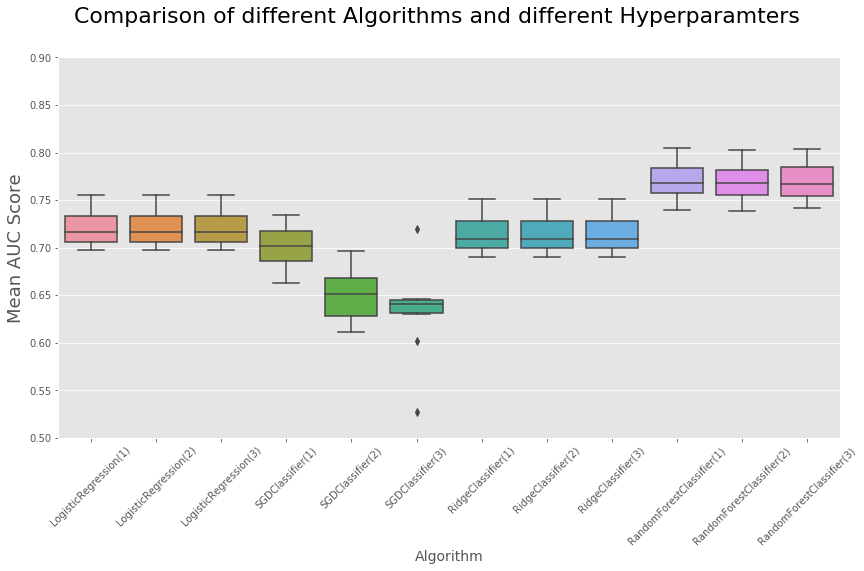

In [25]:
algo_names = ["LogisticRegression(1)", "LogisticRegression(2)","LogisticRegression(3)",
              "SGDClassifier(1)", "SGDClassifier(2)" ,"SGDClassifier(3)",
              "RidgeClassifier(1)", "RidgeClassifier(2)", "RidgeClassifier(3)",
              "RandomForestClassifier(1)", "RandomForestClassifier(2)", "RandomForestClassifier(3)"
             ]

fig = plt.figure(figsize=(14, 7))
fig.suptitle("Comparison of different Algorithms and different Hyperparamters", fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=algo_names, y=cross_val_results)
ax.set_xticklabels(algo_names)
ax.set_xlabel("Algorithm", fontsize=14)
ax.set_ylabel("Mean AUC Score", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)   # Creates the x_ticks to be tilted on it's diagonal.
plt.ylim((0.5, 0.9))

In [26]:
logreg1_clf.fit(X_train, y_train)
logreg2_clf.fit(X_train, y_train)
logreg3_clf.fit(X_train, y_train)

sgdR1_clf.fit(X_train, y_train)
sgdR2_clf.fit(X_train, y_train)
sgdR3_clf.fit(X_train, y_train)

ridgeA1_clf.fit(X_train,y_train)
ridgeA2_clf.fit(X_train,y_train)
ridgeA3_clf.fit(X_train,y_train)

rf_clf.fit(X_train, y_train)
rf2_clf.fit(X_train, y_train)
rf3_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=16,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

<p>Calculate the metrics for each tuned hyperparameter for each method.</p>

In [27]:
logreg1_probs = logreg1_clf.predict_proba(X_test)
logreg1_preds = logreg1_probs[:,1]
logreg1_fpr, logreg1_tpr, logreg1_threshold = metrics.roc_curve(y_test, logreg1_preds)
logreg1_roc_auc = metrics.auc(logreg1_fpr, logreg1_tpr)

logreg2_probs = logreg2_clf.predict_proba(X_test)
logreg2_preds = logreg2_probs[:,1]
logreg2_fpr, logreg2_tpr, logreg2_threshold = metrics.roc_curve(y_test, logreg2_preds)
logreg2_roc_auc = metrics.auc(logreg2_fpr, logreg2_tpr)

logreg3_probs = logreg3_clf.predict_proba(X_test)
logreg3_preds = logreg3_probs[:,1]
logreg3_fpr, logreg3_tpr, logreg3_threshold = metrics.roc_curve(y_test, logreg3_preds)
logreg3_roc_auc = metrics.auc(logreg3_fpr, logreg3_tpr)

sgdR1_probs = sgdR1_clf.decision_function(X_test)
sgdR1_fpr, sgdR1_tpr, sgdR1_threshold = metrics.roc_curve(y_test, sgdR1_probs)
sgdR1_roc_auc = metrics.auc(sgdR1_fpr,sgdR1_tpr)

sgdR2_probs = sgdR2_clf.decision_function(X_test)
sgdR2_fpr, sgdR2_tpr, sgdR2_threshold = metrics.roc_curve(y_test, sgdR2_probs)
sgdR2_roc_auc = metrics.auc(sgdR2_fpr,sgdR2_tpr)

sgdR3_probs = sgdR3_clf.decision_function(X_test)
sgdR3_fpr, sgdR3_tpr, sgdR3_threshold = metrics.roc_curve(y_test, sgdR3_probs)
sgdR3_roc_auc = metrics.auc(sgdR3_fpr,sgdR3_tpr)

ridgeA1_probs = ridgeA1_clf.decision_function(X_test)
ridgeA1_fpr, ridgeA1_tpr, ridgeA1_threshold = metrics.roc_curve(y_test, ridgeA1_probs)
ridgeA1_roc_auc = metrics.auc(ridgeA1_fpr,ridgeA1_tpr)

ridgeA2_probs = ridgeA1_clf.decision_function(X_test)
ridgeA2_fpr, ridgeA2_tpr, ridgeA2_threshold = metrics.roc_curve(y_test, ridgeA2_probs)
ridgeA2_roc_auc = metrics.auc(ridgeA2_fpr,ridgeA2_tpr)

ridgeA3_probs = ridgeA3_clf.decision_function(X_test)
ridgeA3_fpr, ridgeA3_tpr, ridgeA3_threshold = metrics.roc_curve(y_test, ridgeA3_probs)
ridgeA3_roc_auc = metrics.auc(ridgeA3_fpr,ridgeA3_tpr)

rf_probs = rf_clf.predict_proba(X_test)
rf_preds = rf_probs[:,1]
rf_fpr, rf_tpr, rf_threshold = metrics.roc_curve(y_test, rf_preds)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)

rf2_probs = rf2_clf.predict_proba(X_test)
rf2_preds = rf2_probs[:,1]
rf2_fpr, rf2_tpr, rf2_threshold = metrics.roc_curve(y_test, rf2_preds)
rf2_roc_auc = metrics.auc(rf2_fpr, rf2_tpr)

rf3_probs = rf3_clf.predict_proba(X_test)
rf3_preds = rf3_probs[:,1]
rf3_fpr, rf3_tpr, rf3_threshold = metrics.roc_curve(y_test, rf3_preds)
rf3_roc_auc = metrics.auc(rf3_fpr, rf3_tpr)

<h3> Data Processing for Housing Dataset </h3>

In [28]:
housing_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [29]:
housing_df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [30]:
# Knowing that every house sold here is in Washington State, drop the country column
# Drop the time, too
housing_df.drop(["country", "date"], axis=1, inplace=True)
print(housing_df.shape)
housing_df.head()

(4600, 16)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [31]:
print(housing_df["waterfront"].value_counts())
print()
print(housing_df["view"].value_counts())
print()
print(housing_df["condition"].value_counts())

0    4567
1      33
Name: waterfront, dtype: int64

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64


In [32]:
# Set city, statezip, and street into categories
housing_df['city'] = pd.Categorical(housing_df.city).codes
housing_df['statezip'] = pd.Categorical(housing_df.statezip).codes
housing_df.drop("street", axis=1, inplace=True)
housing_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36,62
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35,58
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18,26
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,7
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31,31


In [33]:
# Removing outliers
housing_df = housing_df.drop(housing_df[housing_df["price"] < 1000].index).reset_index(drop=True)
housing_df = housing_df.drop(housing_df[housing_df["price"] > 2000000].index).reset_index(drop=True)
print(housing_df.shape)
housing_df.head()

(4504, 15)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36,62
1,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18,26
2,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,7
3,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31,31
4,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,35,54


In [34]:
x = housing_df.drop("price", axis=1)
y = housing_df.price

print(x.shape)
print(y.shape)

(4504, 14)
(4504,)


In [35]:
train_data,test_data=train_test_split(housing_df,train_size=0.2,random_state=3)

x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)


In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression
import tensorflow as tf

In [37]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
pred = reg.predict(x_test)

In [39]:
accuracy = reg.score(x_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4505877490127017


In [40]:
mse=metrics.mean_squared_error(y_test,pred)
print(f"MSE: ${round(np.sqrt(mse),2)}")

mae=metrics.mean_absolute_error(y_test, pred)
print(f"AE: ${round(np.sqrt(mae),2)}")


MSE: $214014.24
AE: $396.43


In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[x_train.shape[1]]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
    ]) 

In [42]:
optimizer = tf.keras.optimizers.RMSprop(.0001)
model.compile(optimizer=optimizer, loss='mse',metrics=['mae', 'mse'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 11,265
Trainable params: 11,265
Non-trainable params: 0
____________________________________________________

In [44]:
EPOCHS = 300
model_history = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=1)

Train on 720 samples, validate on 180 samples
Epoch 1/300
720/720 [==============================] - 1s 2ms/sample - loss: 375013327940.2667 - mae: 538541.8750 - mse: 375013343232.0000 - val_loss: 378699267003.7333 - val_mae: 532543.1875 - val_mse: 378699284480.0000
Epoch 2/300
720/720 [==============================] - 0s 123us/sample - loss: 374976420977.7778 - mae: 538512.5625 - mse: 374976413696.0000 - val_loss: 378669762696.5333 - val_mae: 532519.1250 - val_mse: 378669760512.0000
Epoch 3/300
720/720 [==============================] - 0s 118us/sample - loss: 374944311250.4889 - mae: 538487.3750 - mse: 374944268288.0000 - val_loss: 378639228017.7778 - val_mae: 532494.1250 - val_mse: 378639220736.0000
Epoch 4/300
720/720 [==============================] - 0s 116us/sample - loss: 374911630631.8222 - mae: 538460.6875 - mse: 374911598592.0000 - val_loss: 378607425217.4222 - val_mae: 532468.1250 - val_mse: 378607435776.0000
Epoch 5/300
720/720 [==============================] - 0s 114us/

720/720 [==============================] - 0s 117us/sample - loss: 362943370581.3334 - mae: 528795.9375 - mse: 362943348736.0000 - val_loss: 366593721412.2667 - val_mae: 522558.9375 - val_mse: 366593736704.0000
Epoch 38/300
720/720 [==============================] - 0s 112us/sample - loss: 361790232621.5111 - mae: 527868.8750 - mse: 361790177280.0000 - val_loss: 365426297696.7111 - val_mae: 521585.9688 - val_mse: 365426311168.0000
Epoch 39/300
720/720 [==============================] - 0s 112us/sample - loss: 360561523643.7333 - mae: 526842.5625 - mse: 360561541120.0000 - val_loss: 364215965013.3333 - val_mae: 520575.2812 - val_mse: 364215992320.0000
Epoch 40/300
720/720 [==============================] - 0s 111us/sample - loss: 359204128904.5333 - mae: 525764.1250 - mse: 359204093952.0000 - val_loss: 362844539380.6222 - val_mae: 519427.8125 - val_mse: 362844520448.0000
Epoch 41/300
720/720 [==============================] - 0s 116us/sample - loss: 357754312385.4222 - mae: 524568.6250 

Epoch 74/300
720/720 [==============================] - 0s 130us/sample - loss: 221172596371.9111 - mae: 396615.5625 - mse: 221172563968.0000 - val_loss: 226975005991.8222 - val_mae: 389330.2812 - val_mse: 226975023104.0000
Epoch 75/300
720/720 [==============================] - 0s 131us/sample - loss: 213767216969.9555 - mae: 388362.8438 - mse: 213767192576.0000 - val_loss: 219613949132.8000 - val_mae: 381061.3438 - val_mse: 219613970432.0000
Epoch 76/300
720/720 [==============================] - 0s 130us/sample - loss: 205925653253.6889 - mae: 379672.8438 - mse: 205925695488.0000 - val_loss: 211892212349.1555 - val_mae: 372326.3438 - val_mse: 211892207616.0000
Epoch 77/300
720/720 [==============================] - 0s 133us/sample - loss: 198017612003.5555 - mae: 370515.7812 - mse: 198017613824.0000 - val_loss: 204188439711.2889 - val_mae: 363397.9688 - val_mse: 204188434432.0000
Epoch 78/300
720/720 [==============================] - 0s 130us/sample - loss: 189964029496.8889 - mae:

Epoch 111/300
720/720 [==============================] - 0s 130us/sample - loss: 43702524586.6667 - mae: 156281.6719 - mse: 43702525952.0000 - val_loss: 52880716231.1111 - val_mae: 156010.7969 - val_mse: 52880711680.0000
Epoch 112/300
720/720 [==============================] - 0s 129us/sample - loss: 43730043653.6889 - mae: 156239.7344 - mse: 43730046976.0000 - val_loss: 52867917232.3556 - val_mae: 156075.8906 - val_mse: 52867919872.0000
Epoch 113/300
720/720 [==============================] - 0s 135us/sample - loss: 43704067959.4667 - mae: 156272.2969 - mse: 43704066048.0000 - val_loss: 52872397983.2889 - val_mae: 156052.8906 - val_mse: 52872400896.0000
Epoch 114/300
720/720 [==============================] - 0s 128us/sample - loss: 43698780615.1111 - mae: 156267.1094 - mse: 43698778112.0000 - val_loss: 52865678085.6889 - val_mae: 156087.4375 - val_mse: 52865679360.0000
Epoch 115/300
720/720 [==============================] - 0s 132us/sample - loss: 43719852760.1778 - mae: 156263.4844

720/720 [==============================] - 0s 136us/sample - loss: 43704969079.4667 - mae: 156277.7344 - mse: 43704975360.0000 - val_loss: 52844457164.8000 - val_mae: 156203.2812 - val_mse: 52844462080.0000
Epoch 149/300
720/720 [==============================] - 0s 131us/sample - loss: 43697748104.5333 - mae: 156345.6875 - mse: 43697737728.0000 - val_loss: 52928746382.2222 - val_mae: 155801.5312 - val_mse: 52928745472.0000
Epoch 150/300
720/720 [==============================] - 0s 134us/sample - loss: 43709985132.0889 - mae: 156182.9531 - mse: 43709988864.0000 - val_loss: 52865505507.5556 - val_mae: 156088.2188 - val_mse: 52865507328.0000
Epoch 151/300
720/720 [==============================] - 0s 130us/sample - loss: 43715686582.0444 - mae: 156317.9531 - mse: 43715686400.0000 - val_loss: 52870777423.6444 - val_mae: 156061.0781 - val_mse: 52870778880.0000
Epoch 152/300
720/720 [==============================] - 0s 132us/sample - loss: 43709487513.6000 - mae: 156294.7188 - mse: 437094

720/720 [==============================] - 0s 133us/sample - loss: 43702524541.1556 - mae: 156263.3906 - mse: 43702525952.0000 - val_loss: 52909192533.3333 - val_mae: 155883.0156 - val_mse: 52909187072.0000
Epoch 186/300
720/720 [==============================] - 0s 132us/sample - loss: 43713161352.5333 - mae: 156356.4844 - mse: 43713159168.0000 - val_loss: 52915347456.0000 - val_mae: 155857.0469 - val_mse: 52915351552.0000
Epoch 187/300
720/720 [==============================] - 0s 134us/sample - loss: 43708568917.3333 - mae: 156286.4844 - mse: 43708567552.0000 - val_loss: 52905189467.0222 - val_mae: 155900.0938 - val_mse: 52905189376.0000
Epoch 188/300
720/720 [==============================] - 0s 130us/sample - loss: 43701490483.2000 - mae: 156133.4375 - mse: 43701497856.0000 - val_loss: 52828944156.4444 - val_mae: 156296.2969 - val_mse: 52828946432.0000
Epoch 189/300
720/720 [==============================] - 0s 135us/sample - loss: 43715186141.8667 - mae: 156385.0938 - mse: 437151

720/720 [==============================] - 0s 131us/sample - loss: 43730629791.2889 - mae: 156313.1562 - mse: 43730624512.0000 - val_loss: 52878160600.1778 - val_mae: 156023.2812 - val_mse: 52878159872.0000
Epoch 223/300
720/720 [==============================] - 0s 134us/sample - loss: 43700476495.6444 - mae: 156166.0625 - mse: 43700482048.0000 - val_loss: 52859188110.2222 - val_mae: 156120.9844 - val_mse: 52859195392.0000
Epoch 224/300
720/720 [==============================] - 0s 132us/sample - loss: 43716015627.3778 - mae: 156334.3281 - mse: 43716018176.0000 - val_loss: 52828218618.3111 - val_mae: 156300.5938 - val_mse: 52828221440.0000
Epoch 225/300
720/720 [==============================] - 0s 134us/sample - loss: 43700711424.0000 - mae: 156334.7812 - mse: 43700711424.0000 - val_loss: 52839270991.6444 - val_mae: 156233.7812 - val_mse: 52839272448.0000
Epoch 226/300
720/720 [==============================] - 0s 133us/sample - loss: 43711940926.5778 - mae: 156338.6719 - mse: 437119

720/720 [==============================] - 0s 140us/sample - loss: 43698096219.0222 - mae: 156321.2656 - mse: 43698094080.0000 - val_loss: 52857600136.5333 - val_mae: 156129.2500 - val_mse: 52857602048.0000
Epoch 260/300
720/720 [==============================] - 0s 138us/sample - loss: 43706118872.1778 - mae: 156338.1406 - mse: 43706118144.0000 - val_loss: 52866552900.2667 - val_mae: 156082.4375 - val_mse: 52866551808.0000
Epoch 261/300
720/720 [==============================] - 0s 133us/sample - loss: 43698200894.5778 - mae: 156349.5625 - mse: 43698192384.0000 - val_loss: 52947760287.2889 - val_mae: 155724.6406 - val_mse: 52947763200.0000
Epoch 262/300
720/720 [==============================] - 0s 135us/sample - loss: 43718312300.0889 - mae: 156263.1719 - mse: 43718316032.0000 - val_loss: 52894879470.9333 - val_mae: 155944.5156 - val_mse: 52894879744.0000
Epoch 263/300
720/720 [==============================] - 0s 141us/sample - loss: 43705896686.9333 - mae: 156244.2031 - mse: 437058

720/720 [==============================] - 0s 132us/sample - loss: 43720674235.7333 - mae: 156395.4375 - mse: 43720675328.0000 - val_loss: 52846501523.9111 - val_mae: 156190.7969 - val_mse: 52846501888.0000
Epoch 297/300
720/720 [==============================] - 0s 132us/sample - loss: 43684750222.2222 - mae: 156259.7188 - mse: 43684741120.0000 - val_loss: 52881328355.5556 - val_mae: 156007.1094 - val_mse: 52881326080.0000
Epoch 298/300
720/720 [==============================] - 0s 130us/sample - loss: 43696937278.5778 - mae: 156300.8750 - mse: 43696934912.0000 - val_loss: 52898307458.8444 - val_mae: 155929.5469 - val_mse: 52898304000.0000
Epoch 299/300
720/720 [==============================] - 0s 132us/sample - loss: 43718590008.8889 - mae: 156294.5625 - mse: 43718586368.0000 - val_loss: 52863082769.0667 - val_mae: 156100.3125 - val_mse: 52863086592.0000
Epoch 300/300
720/720 [==============================] - 0s 134us/sample - loss: 43712248672.7111 - mae: 156182.8438 - mse: 437122

In [45]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: ${:5.2f}".format(mae))

3604/1 - 0s - loss: 49450086754.5927 - mae: 158192.7656 - mse: 46361845760.0000
Testing set Mean Abs Error: $158192.77


In [46]:
hist = pd.DataFrame(model_history.history)
hist['epoch'] = model_history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
295,4.372067e+10,156395.43750,4.372068e+10,5.284650e+10,156190.796875,5.284650e+10,295
296,4.368475e+10,156259.71875,4.368474e+10,5.288133e+10,156007.109375,5.288133e+10,296
297,4.369694e+10,156300.87500,4.369693e+10,5.289831e+10,155929.546875,5.289830e+10,297
298,4.371859e+10,156294.56250,4.371859e+10,5.286308e+10,156100.312500,5.286309e+10,298
299,4.371225e+10,156182.84375,4.371225e+10,5.285337e+10,156151.546875,5.285337e+10,299


In [47]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Price]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,800000])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Price^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([40000000000,350000000000])
  plt.legend()
  plt.show()

In [48]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_shape= [x_train.shape[1]]),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1)
    ])

In [49]:
optimizer = tf.keras.optimizers.Adam(.0001)
model2.compile(optimizer=optimizer, loss='mse',metrics=['mae', 'mse'])

In [50]:
EPOCHS = 300
model2_history = model2.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=0)

In [51]:
loss2, mae2, mse2 = model2.evaluate(x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: ${:5.2f}".format(mae2))

3604/1 - 0s - loss: 49477516134.5705 - mae: 158142.0625 - mse: 46355345408.0000
Testing set Mean Abs Error: $158142.06


## Results

Your results must include at least one comparison table and two plots (for groups 4 plots required).

### Comparison Table

You should compare all of the methods in one or multiple tables, showing clearly the method names, the metrics used for comparison and the results (accuracy, scores, loss, etc). You may use [online tools such as this](https://www.tablesgenerator.com/markdown_tables) for generating and editing neatly-formatted tables in Markdown. You can then copy the code to your Markdown cell to generate the plot. Groups should add more rows/columns as required.
<br>

<b>Notice: </b>You should use at least two different metrics for comparison of your methods.

Your comparison table HERE:<br><br>

| Metric/Method | LogisticRegression | SGDClass. | RidgeClass. | RandomForestClass. |
|---------------|--------------------|-----------|-------------|--------------------|
| Metric 1      | 0.7211145          | 0.7003898 | 0.7153641   | 0.7702192          |
| Metric 2      | 0.7211521          | 0.6378472 | 0.7153612   | 0.7677543          |
| Metric 3      | 0.7211989          | 0.6328185 | 0.7702192   | 0.7688967          |

| Metric/Method | Tensorflow (RMSprop) | Tensorflow (Adam) | LinearRegression |
|---------------|----------------------|-------------------|------------------|
| MAE           | \\$176,996.28        | \\$157,555.37     | \\$214,014.24    |
| MSE           | \\$62,535,426,048    | \\$46,116,622,336 | \\$396.43        |

| Learning Rate/Method | Tensorflow (RMSProp)/MSE | Tensorflow (SGD)/MSE |
|----------------------|--------------------------|----------------------|
| 0.1                  | \\$176,996.28            | \\$157,555.38        |
| 0.01                 | \\$157,961.91            | \\$158,490.00        |
| 0.001                | \\$159,154.00            | \\$158,516.08        |
| 0.0001               | \\$158,048.66            | \\$157,900.33        |

### Plots

Using meaningful plots is an efficient way to visualize and conlude your experiments as well as results. Examples of acceptable plots include but are not limited to:
- ROC curve (can be used with classification only)
- loss plots (precision/recall for classification, mse or mae for regression)
- hyperparameter tuning plots (varying one hyperparameter using for loops on x-axis and accuracy/loss on y-axis)
- train/validation/test errors/loss plots, histogram of errors and so on.

<b>Notice:</b> All plots should have title, xlabel, ylabel, and (if applicable) legend. Use different colors if you have multiple curves on one plot. Points will be deducted if your plots are incomplete. Check matplotlib documentation, examples from the assignments, and research papers or ML articles and find those plots that are applicable to your project. Individual students should have at least 2 plots while groups should have at least 4 plots.


## <font color="red"> Required Coding - Groups should add more cell as required

Text(0.5, 0, 'False Positive Rate')

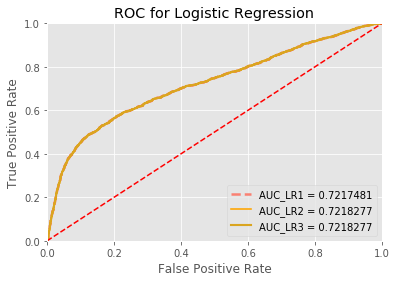

In [65]:
# ROC curve for Logistic Regression
plt.title('ROC for Logistic Regression')
plt.plot(logreg1_fpr, logreg1_tpr, 'salmon', linestyle="--",linewidth=2.5,label = 'AUC_LR1 = %0.7f' % logreg1_roc_auc)
plt.plot(logreg2_fpr, logreg2_tpr, 'orange', linewidth=1.6,label = 'AUC_LR2 = %0.7f' % logreg2_roc_auc)
plt.plot(logreg3_fpr, logreg3_tpr, 'goldenrod', linewidth=2.1,label = 'AUC_LR3 = %0.7f' % logreg2_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 0, 'False Positive Rate')

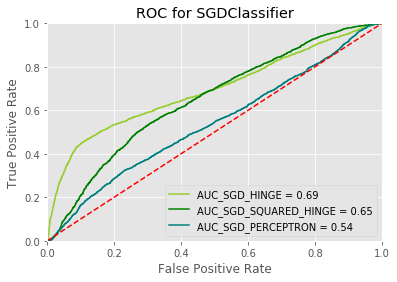

In [53]:
# ROC curve for SGD Classifier
plt.title('ROC for SGDClassifier')
plt.plot(sgdR1_fpr,sgdR1_tpr, 'yellowgreen', label = 'AUC_SGD_HINGE = %0.2f' % sgdR1_roc_auc)
plt.plot(sgdR2_fpr,sgdR2_tpr, 'green', label = 'AUC_SGD_SQUARED_HINGE = %0.2f' % sgdR2_roc_auc)
plt.plot(sgdR3_fpr,sgdR3_tpr, 'teal', label = 'AUC_SGD_PERCEPTRON = %0.2f' % sgdR3_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 0, 'False Positive Rate')

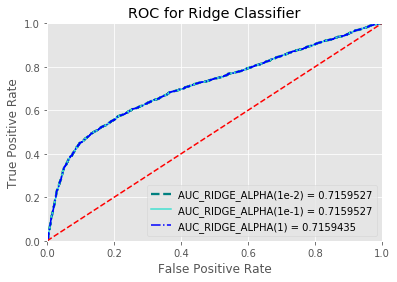

In [63]:
# ROC curve for Ridge Classifier
plt.title('ROC for Ridge Classifier')
plt.plot(ridgeA1_fpr,ridgeA1_tpr, 'teal', linestyle="--",linewidth=2.3,label = 'AUC_RIDGE_ALPHA(1e-2) = %0.7f' % ridgeA1_roc_auc)
plt.plot(ridgeA2_fpr,ridgeA2_tpr, 'turquoise', label = 'AUC_RIDGE_ALPHA(1e-1) = %0.7f' % ridgeA2_roc_auc)
plt.plot(ridgeA3_fpr,ridgeA3_tpr, 'blue', linestyle="-.", label = 'AUC_RIDGE_ALPHA(1) = %0.7f' % ridgeA3_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 0, 'False Positive Rate')

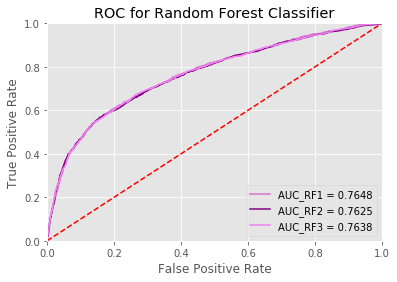

In [55]:
# ROC curve for Random Forest Classifier
plt.title('ROC for Random Forest Classifier')
plt.plot(rf_fpr, rf_tpr, 'orchid', label = 'AUC_RF1 = %0.4f' % rf_roc_auc)
plt.plot(rf2_fpr, rf2_tpr, 'purple', label = 'AUC_RF2 = %0.4f' % rf2_roc_auc)
plt.plot(rf3_fpr, rf3_tpr, 'violet', label = 'AUC_RF3 = %0.4f' % rf3_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

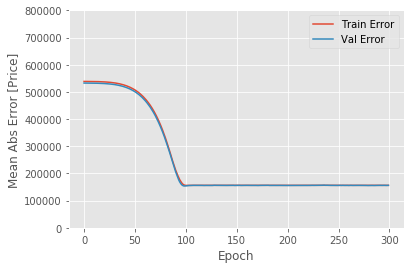

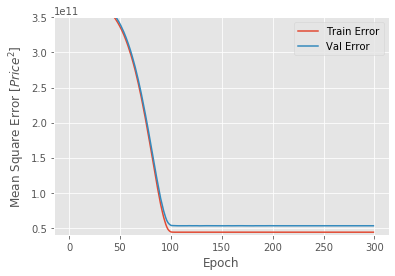

In [56]:
# Plot history for model1 Neural Network
plot_history(model_history)

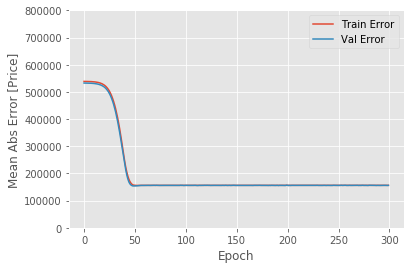

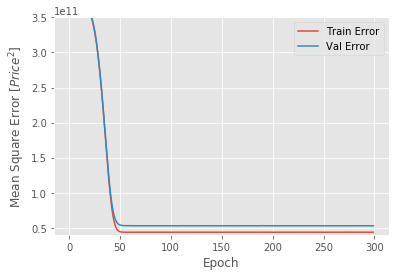

In [57]:
# Plot history for model2 Neural Network
plot_history(model2_history)

## Discussion

Write at least two paragraphs to describe and discuss your results. Make arguments based on your observations and results. Use reasoning and analytical thinking for your discussion.


<b>Notice:</b> Having a thorough discussion is VERY important and has a significant impact on your final score!

## Grading

Project grading rubric (total 100 points - 20% of the final grade):

- Project proposal: 10 points

- Final submission: 70 points - Breakdown as follows

    - 30 points: Methods, hyperparameter tuning and comparison table
    
    - 20 points: Plots

    - 20 points: Discussion (2 paragraphs)
    
- Project complexity and intellectual efforts judged by the instructor: 20 points
    
<b>Notice:</b> similar to the assignments, up to 10 points may be deducted if your notebook is not easy to read and/or has spelling/grammatical errors, so proofread your notebook!

## How to Submit and Due Date - Late Penalty Will be Strictly Applied!

Name your final project notebook ```Lastname-Project.ipynb```. Submit the notebook file with your dataset file in a zip file named EXACTLY as `Lastname-Project.zip` using the ```Final Project``` link on Blackboard. For groups, only one submission is required.

<font color=red><b>Project Final Submission Due Date: Monday Dec 9th 11:59PM.</b></font>